# Preamble

In [1]:
import os, sys, glob
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import scipy.io as sio
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sys.path.append('/Users/lindenmp/Dropbox/Work/ResProjects/NormativeNeuroDev_CrossSec/code/func/')
from proj_environment import set_proj_env
from func import mark_outliers, winsorize_outliers_signed

In [3]:
train_test_str = 'squeakycleanExclude'
exclude_str = 't1Exclude' # 't1Exclude' 'fsFinalExclude'
parc_str = 'schaefer' # 'schaefer' 'lausanne'
parc_scale = 400 # 200 400 | 60 125
extra_str = ''
# extra_str = '_nuis-netdens'
# extra_str = '_nuis-str'
parcel_names, parcel_loc, drop_parcels, num_parcels, yeo_idx, yeo_labels = set_proj_env(train_test_str = train_test_str, exclude_str = exclude_str,
                                                                            parc_str = parc_str, parc_scale = parc_scale, extra_str = extra_str)

### Setup output directory

In [4]:
print(os.environ['MODELDIR_BASE'])
print(os.environ['MODELDIR'])
if not os.path.exists(os.environ['MODELDIR']): os.makedirs(os.environ['MODELDIR'])

/Users/lindenmp/Dropbox/Work/ResProjects/NormativeNeuroDev_CrossSec/analysis/normative/t1Exclude/squeakycleanExclude/schaefer_400_streamlineCount
/Users/lindenmp/Dropbox/Work/ResProjects/NormativeNeuroDev_CrossSec/analysis/normative/t1Exclude/squeakycleanExclude/schaefer_400_streamlineCount


## Load data

In [5]:
# Load data
df = pd.read_csv(os.path.join(os.environ['MODELDIR_BASE'], 'df_pheno.csv'))
df.set_index(['bblid', 'scanid'], inplace = True)
print(df.shape)

(1100, 20)


In [6]:
# Load data
df_node = pd.read_csv(os.path.join(os.environ['MODELDIR_BASE'], 'df_node_base.csv'))
df_node.set_index(['bblid', 'scanid'], inplace = True)
print(df_node.shape)

(1100, 1601)


In [7]:
df_node.head()

,,squeakycleanExclude,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,...,mc_390,mc_391,mc_392,mc_393,mc_394,mc_395,mc_396,mc_397,mc_398,mc_399
bblid,scanid,,,,,,,,,,,,,,,,,,,,,
81287,2738,0,2.538998,2.488712,2.136251,2.066125,1.374327,2.477584,1.601976,2.362101,1.465576,...,0.968570,0.954994,0.987192,0.976455,0.994941,0.992331,0.996962,0.987588,0.989885,0.997620
80680,2739,1,3.254469,2.278151,2.296958,1.902822,1.987542,2.750607,2.294891,3.120072,2.113432,...,0.967916,0.919031,0.995182,0.964410,0.986566,0.982010,0.993621,0.953884,0.986840,0.989380
81754,2740,1,2.917887,2.928994,3.132508,2.388521,2.134858,2.946783,3.023909,2.878643,2.071769,...,0.972310,0.993218,0.998226,0.995700,0.998244,0.998225,0.999274,0.990514,0.996410,0.994127
81903,2749,0,2.893595,2.425235,2.675642,2.030183,1.718173,2.635942,1.754288,3.178223,2.236111,...,0.951660,0.962255,0.996996,0.985469,0.994995,0.991197,0.999216,0.994302,0.997137,0.989855
81043,2750,0,2.409790,1.945500,2.543891,1.522295,1.633667,2.234736,1.452266,3.741401,2.478794,...,0.891219,0.975395,0.991177,0.930168,0.992194,0.981106,0.995268,0.992437,0.988617,0.991444


# Plots

In [8]:
# Labels
sns.set(style='white', context = 'talk', font_scale = .8)

/Users/lindenmp/.virtualenvs/NeuroDev_NetworkControl/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


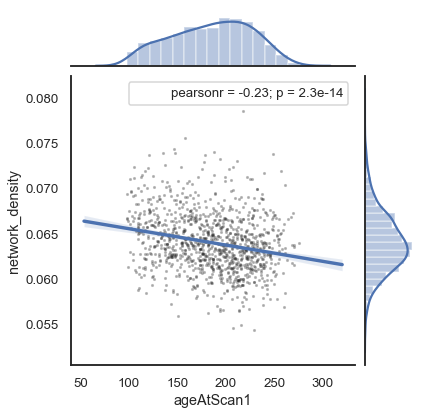

In [9]:
metric_x = 'ageAtScan1'
metric_y = 'network_density'
f = sns.jointplot(x = df[metric_x], y = df[metric_y], kind="reg")
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

In [10]:
metrics = ('ct', 'str', 'ac', 'mc')
df_node_mean = pd.DataFrame(index = df_node.index, columns = metrics)
for metric in metrics:
    df_node_mean[metric] = df_node.filter(regex = metric, axis = 1).mean(axis = 1)

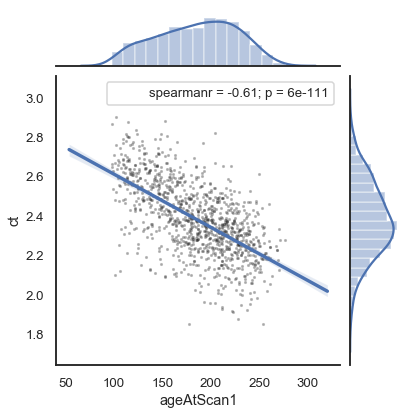

In [11]:
metric_x = 'ageAtScan1'
metric_y = 'ct'
f = sns.jointplot(x = df[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.spearmanr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

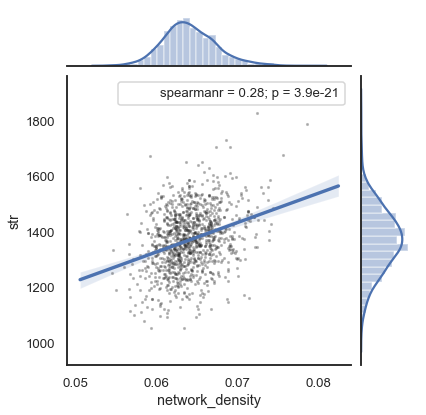

In [12]:
metric_x = 'network_density'
metric_y = 'str'
f = sns.jointplot(x = df[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.spearmanr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

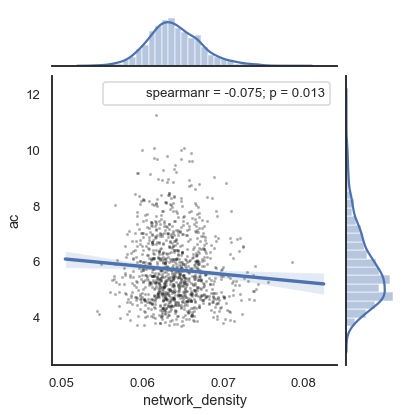

In [13]:
metric_x = 'network_density'
metric_y = 'ac'
f = sns.jointplot(x = df[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.spearmanr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

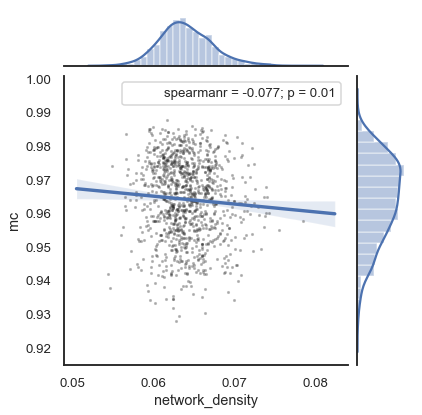

In [14]:
metric_x = 'network_density'
metric_y = 'mc'
f = sns.jointplot(x = df[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.spearmanr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

In [15]:
my_thresh = 3

In [16]:
for metric in metrics:
    x = df_node_mean.loc[:,metric].copy()
    outliers = mark_outliers(x, thresh = my_thresh)
    print(metric + ': ' + str(np.round((outliers.sum() / x.shape[0]) * 100,2)))

ct: 17.55
str: 17.55
ac: 17.55
mc: 13.09


A higher threshold than 3 probably makes sense but sticking with convention to avoid 'kick me' signs with reviewers.

Note, results are unaffected by setting my_thresh to 4,5, or 6

### Check frequency of outliers

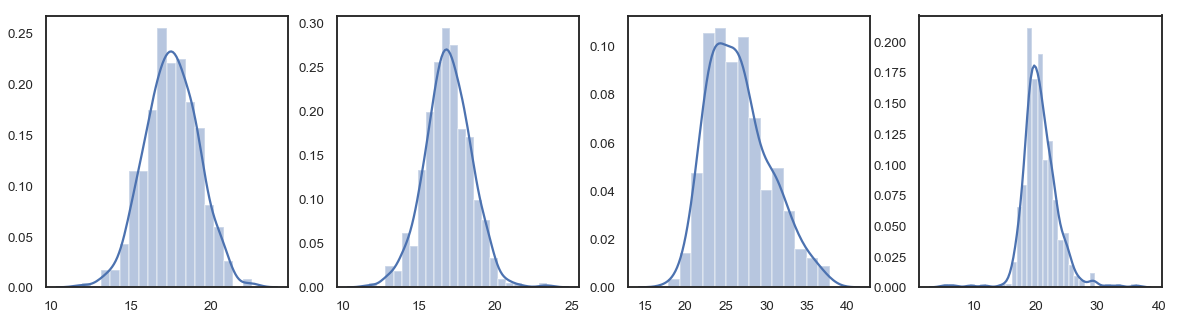

In [17]:
df_node_mask = pd.DataFrame(index = df_node.index, columns = df_node.columns)
for i, col in enumerate(df_node.columns):
    x = df_node.loc[:,col].copy()
    x_out = mark_outliers(x, thresh = my_thresh)
    df_node_mask.loc[:,col] = x_out

f, axes = plt.subplots(1,4)
f.set_figwidth(20)
f.set_figheight(5)

for i, metric in enumerate(metrics):
    if df_node_mask.filter(regex = metric).sum().any():
        sns.distplot(df_node_mask.filter(regex = metric).sum()/df_node_mask.filter(regex = metric).shape[0]*100, ax = axes[i])

In [18]:
for i, col in enumerate(df_node.columns):
    x = df_node.loc[:,col].copy()
    x_out = winsorize_outliers_signed(x, thresh = my_thresh)
    df_node.loc[:,col] = x_out

In [19]:
my_str = os.environ['MODELDIR'].split('/')[-1]
my_str = my_str.split('_')[-1]
my_str

'streamlineCount'

In [20]:
if my_str == 'nuis-streamline' or my_str == 'nuis-netdens':
    df_node = df_node.filter(regex = 'squeakycleanExclude|str|ac|mc', axis = 1)
elif my_str == 'nuis-str':
    df_str = df_node.filter(regex = 'str', axis = 1).copy()
    df_node = df_node.filter(regex = 'squeakycleanExclude|ac|mc', axis = 1)

In [21]:
df_node.shape

(1100, 1601)

## Nuisance regression

### cortical thickness

In [22]:
if my_str == 'nuis-streamline' or my_str == 'nuis-netdens' or my_str == 'nuis-str':
    print('Skipping...')
else:
    # labels of nuisance regressors
    nuis = ['mprage_antsCT_vol_TBV','averageManualRating']
    print(nuis)
    df_nuis = df[nuis]
    df_nuis = sm.add_constant(df_nuis)

    cols = df_node.filter(regex = 'ct', axis = 1).columns

    mdl = sm.OLS(df_node.loc[:,cols].astype(float), df_nuis.astype(float)).fit()
    y_pred = mdl.predict(df_nuis)
    y_pred.columns = cols
    df_node.loc[:,cols] = df_node.loc[:,cols] - y_pred

['mprage_antsCT_vol_TBV', 'averageManualRating']


/Users/lindenmp/.virtualenvs/NeuroDev_NetworkControl/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
if my_str == 'nuis-str':
    print('Running strength nuisance regression')
    for col in df_node.filter(regex = 'ac|mc', axis = 1).columns:
        nuis = ['mprage_antsCT_vol_TBV', 'dti64MeanRelRMS']
        df_nuis = df[nuis]
        df_nuis = sm.add_constant(df_nuis)

        col_nuis = 'str_' + col.split('_')[1]
        df_nuis.loc[:,'str'] = df_str.loc[:,col_nuis]

        mdl = sm.OLS(df_node.loc[:,col].astype(float), df_nuis.astype(float)).fit()
        y_pred = mdl.predict(df_nuis)
        df_node.loc[:,col] = df_node.loc[:,col] - y_pred
else:
    if my_str == 'nuis-netdens':
        print('Running network density nuisance regression')
        nuis = ['mprage_antsCT_vol_TBV', 'dti64MeanRelRMS', 'network_density']
        df_nuis = df[nuis]
    else:
        print('Running standard nuisance regression')
        nuis = ['mprage_antsCT_vol_TBV', 'dti64MeanRelRMS']
        df_nuis = df[nuis]
    print(nuis)
    df_nuis = sm.add_constant(df_nuis)

    cols = df_node.filter(regex = 'str|ac|mc', axis = 1).columns

    mdl = sm.OLS(df_node.loc[:,cols].astype(float), df_nuis.astype(float)).fit()
    y_pred = mdl.predict(df_nuis)
    y_pred.columns = cols
    df_node.loc[:,cols] = df_node.loc[:,cols] - y_pred

Running standard nuisance regression
['mprage_antsCT_vol_TBV', 'dti64MeanRelRMS']


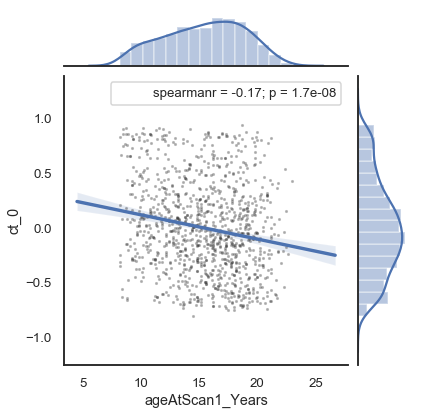

In [24]:
f = sns.jointplot(x = df['ageAtScan1_Years'], y = df_node['ct_0'], kind="reg")
f.annotate(sp.stats.spearmanr)
# f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

In [25]:
df_node.head()

,,squeakycleanExclude,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,...,mc_390,mc_391,mc_392,mc_393,mc_394,mc_395,mc_396,mc_397,mc_398,mc_399
bblid,scanid,,,,,,,,,,,,,,,,,,,,,
81287,2738,0,-0.387087,0.004407,-0.267396,-0.028519,-0.339460,-0.222917,-0.555840,-0.554495,-0.403831,...,0.029287,0.010829,-0.003852,0.019600,0.006431,0.016437,0.000043,0.013576,0.002063,0.015741
80680,2739,1,0.234626,-0.224065,-0.170527,-0.193183,0.282391,-0.087519,0.163466,0.131132,0.250391,...,0.033283,-0.028287,0.004943,0.002286,-0.000051,0.009080,-0.002439,-0.016799,0.000636,0.011507
81754,2740,1,0.031087,0.452194,0.682236,0.294448,0.417452,0.303948,0.855036,-0.007639,0.199695,...,0.031682,0.051293,0.006959,0.041199,0.009133,0.021211,0.002054,0.015383,0.007908,0.010865
81903,2749,0,0.035996,-0.045988,0.318626,-0.063466,-0.001922,0.035968,-0.422805,0.314472,0.362054,...,0.010152,0.022177,0.005587,0.032746,0.005475,0.013376,0.001784,0.018394,0.008128,0.005626
81043,2750,0,-0.444289,-0.525050,0.189272,-0.571304,-0.086752,-0.360070,-0.725818,0.813983,0.604498,...,-0.051749,0.033476,-0.000507,-0.022667,0.002194,0.002912,-0.002322,0.015815,-0.000447,0.006430


In [26]:
df_node.isna().any().any()

False

## Save out

In [27]:
# Save out
df_node.to_csv(os.path.join(os.environ['MODELDIR'], 'df_node_clean.csv'))